# HW 5

소프트웨어융합학과 2018102111 서보민

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np

digits = load_digits()

1.1. After loading the dataset, visualize the first few digits datasets

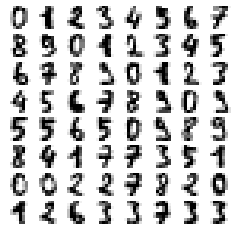

In [2]:
fig = plt.figure(figsize=(4, 4))  

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.set_axis_off()
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest') 

1.2. Classify the digits using random forest.


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

clf = RandomForestClassifier( random_state=123)

X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.2, shuffle=False)

In [4]:
from sklearn.model_selection import GridSearchCV, RepeatedKFold

param_grid = {'max_depth' : np.arange(10,20,1)}
grid = GridSearchCV(clf, param_grid = param_grid, 
                    cv=RepeatedKFold(n_splits=5, n_repeats=5, random_state = 123),
                    return_train_score=True)
grid.fit(X_train, y_train)
print(f"best parameters: {grid.best_params_}")
print(f"valid-set score: {grid.score(X_test, y_test):.3f}")

best parameters: {'max_depth': 14}
valid-set score: 0.931


In [5]:
clf = RandomForestClassifier(max_depth = 14, random_state=123)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

1.3. show the classification report and discuss the results.

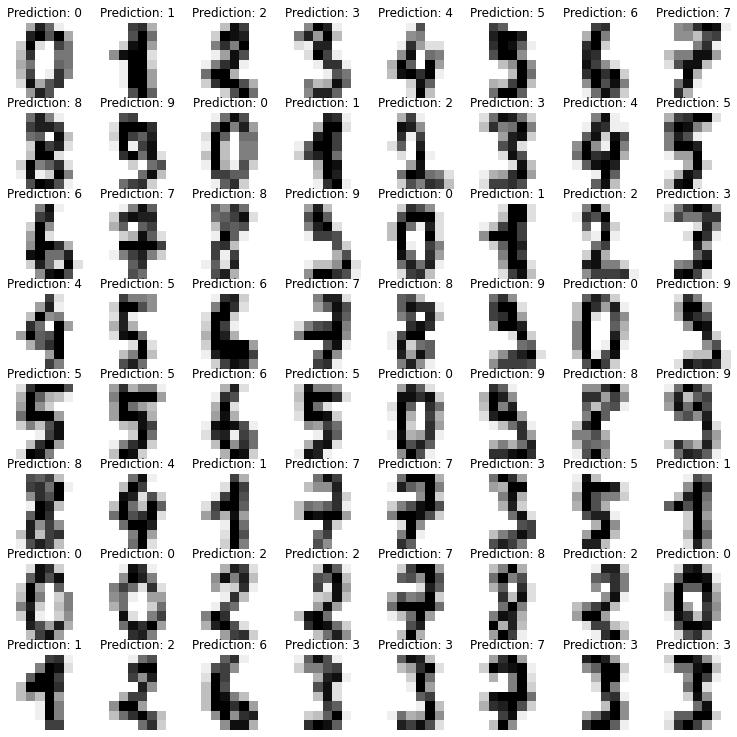

In [8]:
y = clf.predict(data)
fig = plt.figure(figsize=(13, 13))  
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.set_axis_off()
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest') 
    ax.set_title(f'Prediction: {y[i]}')

In [9]:
for i in range(10,20):
    clf = RandomForestClassifier(max_depth = i, random_state=123)
    clf.fit(X_train, y_train)
    predicted = clf.predict(X_test)
    print("max_depth =",i, " Error : ", (predicted != y_test).sum(),
         " accuracy  : ",(len(y_test) - (predicted != y_test).sum()) / len(y_test))

max_depth = 10  Error :  29  accuracy  :  0.9194444444444444
max_depth = 11  Error :  28  accuracy  :  0.9222222222222223
max_depth = 12  Error :  26  accuracy  :  0.9277777777777778
max_depth = 13  Error :  26  accuracy  :  0.9277777777777778
max_depth = 14  Error :  25  accuracy  :  0.9305555555555556
max_depth = 15  Error :  26  accuracy  :  0.9277777777777778
max_depth = 16  Error :  27  accuracy  :  0.925
max_depth = 17  Error :  27  accuracy  :  0.925
max_depth = 18  Error :  27  accuracy  :  0.925
max_depth = 19  Error :  27  accuracy  :  0.925


# 예측이 잘못된 경우 시각화

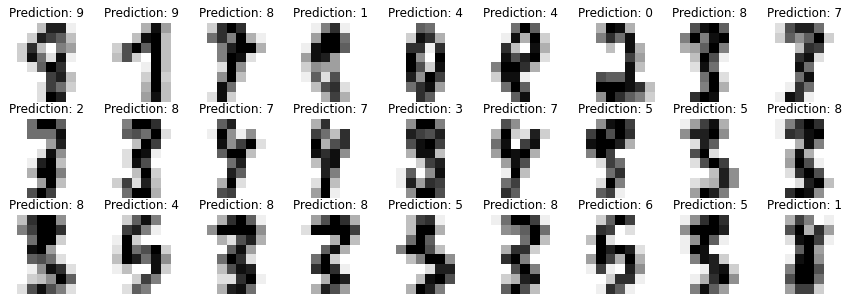

In [10]:
fig = plt.figure(figsize=(15, 5))  
i = 1
for j in np.where(predicted != y_test)[0]:
    p = X_test[j].reshape(8,8)
    ax = fig.add_subplot(3, 9, i)
    ax.set_axis_off()
    ax.imshow(p, cmap=plt.cm.binary, interpolation='nearest') 
    ax.set_title(f'Prediction: {predicted[j]}')
    i += 1 

정확도가 굉장히 높으면 예측에 실패한 경우를 따로 시각해보아도 인간의 눈으로도 구별하기 힘든 케이스이라고 생각합니다.

1.4. Plot confusion matrix and discuss the results.

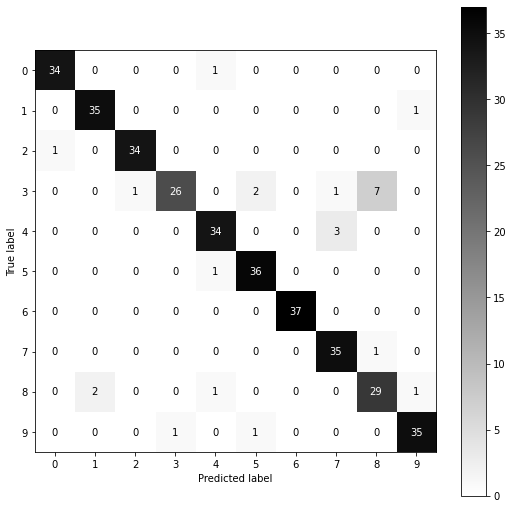

In [11]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report

fig, ax = plt.subplots(figsize=(9, 9))
clf = RandomForestClassifier(max_depth = 14, random_state=123).fit(X_train,y_train)
plot_confusion_matrix(clf, X_test, y_test, cmap='gray_r', ax=ax)

In [12]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        35
           1       0.95      0.97      0.96        36
           2       0.97      0.97      0.97        35
           3       0.96      0.68      0.79        37
           4       0.92      0.92      0.92        37
           5       0.90      0.95      0.92        37
           6       0.97      1.00      0.99        37
           7       0.90      0.97      0.93        36
           8       0.78      0.88      0.83        33
           9       0.95      0.95      0.95        37

    accuracy                           0.93       360
   macro avg       0.93      0.93      0.92       360
weighted avg       0.93      0.93      0.92       360



시각화한 경우에서 확인했듯 3을 8로 예측하는 경우에 가장 오류가 자주 일어나는 것을 확인할 수 있었습니다.

1.5. Apply PCA to the digits dataset to project them to 2 dimensions and visualize the first twocomponents (2d scatter plot). Discuss the results.

(1797, 64)
(1797, 2)


Text(0, 0.5, 'second principal component')

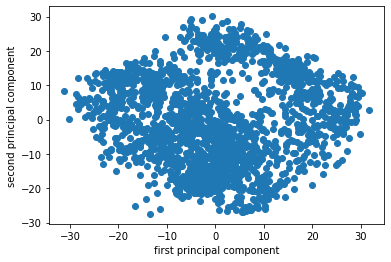

In [13]:
from sklearn.decomposition import PCA

print(data.shape)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data)
plt.scatter(X_pca[:, 0], X_pca[:, 1])
print(X_pca.shape)
plt.xlabel("first principal component")
plt.ylabel("second principal component")

1.6. A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data. This can be determined by looking at the cumulative explained variance ratio as a function of the number of components. Plot the "cumulative explained variance ratio (y-axis)” as a function of “number of component” (x-axis).

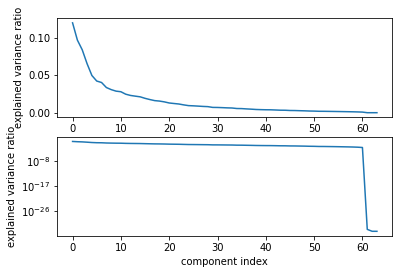

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

pca_scaled = make_pipeline(StandardScaler(), PCA())
pca_scaled.fit(X_train, y_train)
pca = pca_scaled.named_steps['pca']

fig, axes = plt.subplots(2)
axes[0].plot(pca.explained_variance_ratio_)
axes[1].semilogy(pca.explained_variance_ratio_)
for ax in axes:
    ax.set_xlabel("component index")
    ax.set_ylabel("explained variance ratio")

1.7. You will apply k-means on the same simple digits data to try to identify similar digits without using the original label information; this might be similar to a first step in extracting meaning from a new dataset about which you don’t have any a prior label information. Apply k-means clustering to the digits dataset with 10 clusters. The result will be 10 clusters and 64 dimensions. Notice that the cluster centers themselves are 64- dimenstional points, and themselves be interpreted as the “typical” digit within the cluster. Visualize what these cluster centers look like (plot 10 different digits images like below). Hint: reshape kmeans.cluster_centers_ to create the digits images. And discuss the results. 

(10, 64)


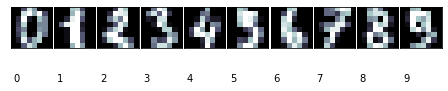

In [15]:
from sklearn.cluster import KMeans

data = scale(digits.data)
kmeans = KMeans(n_clusters=10, random_state=123)
kmeans.fit(data)
print(kmeans.cluster_centers_.shape)

def print_digits(images,y,max_n=10):
    fig = plt.figure(figsize=(12,12))
    fig.subplots_adjust(left=0,right=1,bottom=0,top=1,hspace=0.05,wspace=0.05)
    i=0
    while i<max_n and i<images.shape[0]:
        p=fig.add_subplot(20,20,i+1,xticks=[],yticks=[])
        p.imshow(images[i],cmap=plt.cm.bone)
        p.text(0,14,str(y[i]))
        i = i + 1
        
print_digits(digits.images, digits.target,max_n=10)

(10, 64)


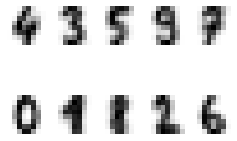

In [16]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
print(kmeans.cluster_centers_.shape)

fig, ax = plt.subplots(2, 5, figsize=(4, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set_axis_off()
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

# 참고 자료
https://antilibrary.org/1095 \
https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

1.8. Because k-means knows nothing about the identity (label) of the cluster, the 0-9 labels may be
permuted. Fix this by matching each learned cluster label with the true labels and check how
accurate our unsupervised clustering is in finding similar digits within the data. Hint:
accuracy_score


In [27]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

In [28]:
X_train, X_test,y_train,y_test,images_train,images_test = train_test_split(data, digits.target, digits.images, test_size=0.2,random_state=123)

In [29]:
n_samples,n_features = X_train.shape
n_digits = len(np.unique(y_train))
labels2 = y_train
from sklearn.metrics import accuracy_score
from sklearn import cluster
clf = cluster.KMeans(init='k-means++',n_clusters=10,random_state=123)
clf.fit(X_train)

y_pred=clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.2

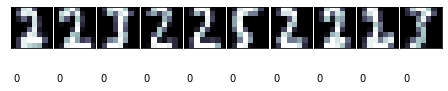

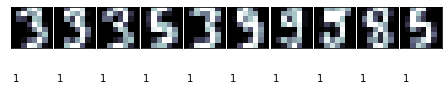

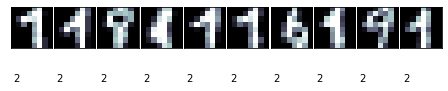

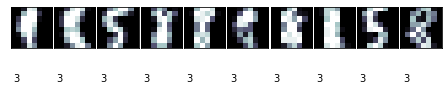

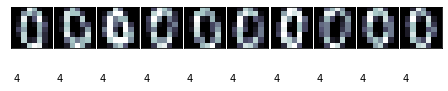

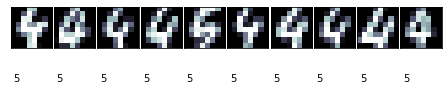

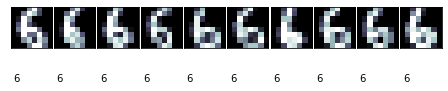

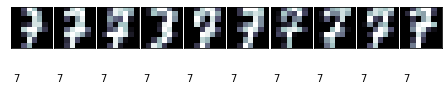

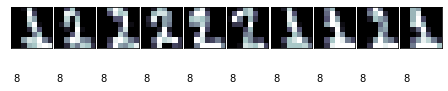

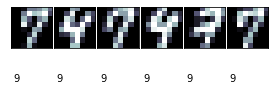

In [30]:
def print_cluster(images,y_pred,cluster_number):
    images = images[y_pred==cluster_number]
    y_pred=y_pred[y_pred==cluster_number]
    print_digits(images,y_pred,max_n=10)
for i in range(10):
    print_cluster(images_test,y_pred,i)

In [31]:
print("Data size : ",len(y_pred))
print('Error :', (y_pred != y_test).sum())

Data size :  360
Error : 288


1.9. With just a simple k-means algorithm, we can discover the correct groups for [your accuracy
score in 1.8] of the input digits. Plot the confusion matrix and check for this and discuss the results.

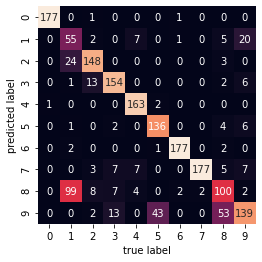

In [32]:
import seaborn as sns

mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');